In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**BLOQUE 1 Cargar el dataset**

In [4]:
import pandas as pd
import numpy as np

# Carga normal del CSV sin truncar líneas
df = pd.read_csv('/content/drive/MyDrive/TFG/Deteccion de malware/Obfuscated-MalMem2022.csv')

# Limpieza de nombres de columnas (por si tienen espacios invisibles)
df.columns = df.columns.str.strip()

# Comprobamos nombres de columnas
print("Columnas disponibles:", df.columns.tolist())

Columnas disponibles: ['Category', 'pslist.nproc', 'pslist.nppid', 'pslist.avg_threads', 'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls', 'dlllist.avg_dlls_per_proc', 'handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile', 'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread', 'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer', 'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load', 'ldrmodules.not_in_init', 'ldrmodules.not_in_mem', 'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg', 'ldrmodules.not_in_mem_avg', 'malfind.ninjections', 'malfind.commitCharge', 'malfind.protection', 'malfind.uniqueInjections', 'psxview.not_in_pslist', 'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool', 'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles', 'psxview.not_in_session', 'psxview.not_in_deskthrd', 'psxview.not_in_pslist_false_avg', 'psxview.not_in_eprocess_pool_false_avg', 'psxview.not_in_e

In [5]:
print("Filas al cargar CSV:", df.shape[0])


Filas al cargar CSV: 58596


In [6]:
for i, col in enumerate(df.columns):
    print(i, col)


0 Category
1 pslist.nproc
2 pslist.nppid
3 pslist.avg_threads
4 pslist.nprocs64bit
5 pslist.avg_handlers
6 dlllist.ndlls
7 dlllist.avg_dlls_per_proc
8 handles.nhandles
9 handles.avg_handles_per_proc
10 handles.nport
11 handles.nfile
12 handles.nevent
13 handles.ndesktop
14 handles.nkey
15 handles.nthread
16 handles.ndirectory
17 handles.nsemaphore
18 handles.ntimer
19 handles.nsection
20 handles.nmutant
21 ldrmodules.not_in_load
22 ldrmodules.not_in_init
23 ldrmodules.not_in_mem
24 ldrmodules.not_in_load_avg
25 ldrmodules.not_in_init_avg
26 ldrmodules.not_in_mem_avg
27 malfind.ninjections
28 malfind.commitCharge
29 malfind.protection
30 malfind.uniqueInjections
31 psxview.not_in_pslist
32 psxview.not_in_eprocess_pool
33 psxview.not_in_ethread_pool
34 psxview.not_in_pspcid_list
35 psxview.not_in_csrss_handles
36 psxview.not_in_session
37 psxview.not_in_deskthrd
38 psxview.not_in_pslist_false_avg
39 psxview.not_in_eprocess_pool_false_avg
40 psxview.not_in_ethread_pool_false_avg
41 psxvie

**BLOQUE 2 Limpieza de valores numéricos mal formateados**

In [7]:
# Proteger columnas de etiquetas
columnas_protegidas = ['Class', 'Category']

# Función para limpiar números mal formateados con puntos como separadores de miles
def limpiar_columna_segura(col, nombre_columna):
    if col.dtype == 'object' and nombre_columna not in columnas_protegidas:
        try:
            col_sin_puntos = col.str.replace('.', '', regex=False)
            return pd.to_numeric(col_sin_puntos, errors='coerce')
        except:
            return col  # Si falla, lo devuelve tal cual
    else:
        return col

# Aplicamos limpieza solo a columnas no protegidas
df = df.apply(lambda col: limpiar_columna_segura(col, col.name), axis=0)

# Verificamos
print("¿Hay NaNs tras limpieza?:", df.isnull().values.any())
print("Columnas finales:", df.columns.tolist())



¿Hay NaNs tras limpieza?: False
Columnas finales: ['Category', 'pslist.nproc', 'pslist.nppid', 'pslist.avg_threads', 'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls', 'dlllist.avg_dlls_per_proc', 'handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile', 'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread', 'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer', 'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load', 'ldrmodules.not_in_init', 'ldrmodules.not_in_mem', 'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg', 'ldrmodules.not_in_mem_avg', 'malfind.ninjections', 'malfind.commitCharge', 'malfind.protection', 'malfind.uniqueInjections', 'psxview.not_in_pslist', 'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool', 'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles', 'psxview.not_in_session', 'psxview.not_in_deskthrd', 'psxview.not_in_pslist_false_avg', 'psxview.not_in_eprocess_pool_f

In [8]:
print("Filas tras limpieza numérica:", df.shape[0])
print("¿Hay NaNs?", df.isnull().values.any())


Filas tras limpieza numérica: 58596
¿Hay NaNs? False


In [9]:
# Mostrar porcentaje de valores nulos por columna
nan_por_columna = df.isnull().mean() * 100
print(nan_por_columna[nan_por_columna > 0].sort_values(ascending=False))

Series([], dtype: float64)


**BLOQUE 3 Limpieza adicional: NaNs y columnas inútiles**

In [10]:
# Eliminar espacios en nombres de columnas, si los hay
df.columns = df.columns.str.strip()

In [11]:
# Columnas que queremos conservar siempre
columnas_protegidas = ['Class', 'Category']
columnas_protegidas_presentes = [col for col in columnas_protegidas if col in df.columns]

# Eliminar columnas con >50% de nulos (excepto protegidas)
columnas_a_conservar = df.columns[
    (df.isnull().mean() <= 0.5) | (df.columns.isin(columnas_protegidas_presentes))
]
df = df[columnas_a_conservar]

# Eliminar columnas con un solo valor (sin varianza)
df = df.loc[:, df.nunique() > 1]

# Mostrar cuántos NaNs hay por fila antes de borrar nada
nan_por_fila = df.isnull().sum(axis=1)
print("Máximo NaNs en una fila:", nan_por_fila.max())
print("Media de NaNs por fila:", nan_por_fila.mean())

# Solo eliminar filas que estén MUY vacías (menos del 80% completas)
umbral_columnas_validas = int(df.shape[1] * 0.8)
df = df.dropna(thresh=umbral_columnas_validas)

# Comprobamos resultado
print("Shape final del dataset limpio:", df.shape)



Máximo NaNs en una fila: 0
Media de NaNs por fila: 0.0
Shape final del dataset limpio: (58596, 54)


**BLOQUE 4 Separar variables y codificar etiquetas**

In [12]:
df.columns


Index(['Category', 'pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.avg_handlers', 'dlllist.ndlls', 'dlllist.avg_dlls_per_proc',
       'handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxview.not_in_pslist_false_avg',
       'psxview.

In [13]:
from sklearn.preprocessing import LabelEncoder

# Definir X e y
X = df.drop(columns=['Class', 'Category'])  # Eliminar también 'Category'
y = df['Class']

# Codificamos etiquetas
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Comprobamos clases
print("Clases detectadas:", label_encoder.classes_)
print("X shape:", X.shape)
print("y shape:", y_encoded.shape)


Clases detectadas: ['Benign' 'Malware']
X shape: (58596, 52)
y shape: (58596,)


In [14]:
df.columns

Index(['Category', 'pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.avg_handlers', 'dlllist.ndlls', 'dlllist.avg_dlls_per_proc',
       'handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxview.not_in_pslist_false_avg',
       'psxview.

**BLOQUE 5 División en entrenamiento y prueba¨**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# División 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificamos
print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de prueba:", X_test.shape)


Tamaño del set de entrenamiento: (46876, 52)
Tamaño del set de prueba: (11720, 52)


**BLOQUE 6 Escalado y entrenamiento del modelo**

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Entrenamiento del modelo
modelo = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)

# Validación cruzada sobre el conjunto de entrenamiento
scores = cross_val_score(modelo, X_train_scaled, y_train, cv=5)

print("Validación cruzada (5 folds):")
print(f"Media de accuracy: {scores.mean():.4f}")
print(f"Desviación estándar: {scores.std():.4f}")

# Entrenamos el modelo final completo con todos los datos de entrenamiento
modelo.fit(X_train_scaled, y_train)

Validación cruzada (5 folds):
Media de accuracy: 0.9999
Desviación estándar: 0.0001


RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

**BLOQUE 7 Evaluación del modelo**

Informe de clasificación:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5860
           1       1.00      1.00      1.00      5860

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



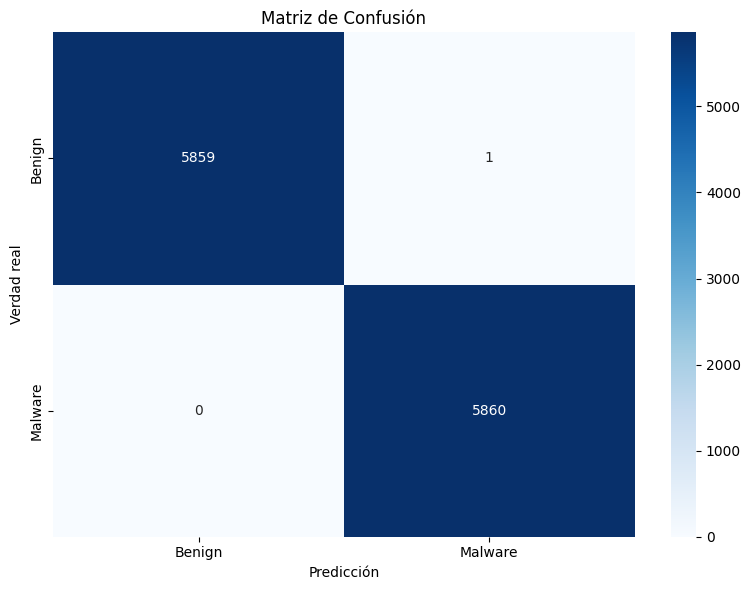

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicción en el set de test
y_pred = modelo.predict(X_test_scaled)

# Informe de clasificación
print("Informe de clasificación:\n")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # ← Corregido aquí
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malware"], yticklabels=["Benign", "Malware"])
plt.xlabel("Predicción")
plt.ylabel("Verdad real")
plt.title("Matriz de Confusión")
plt.tight_layout()
plt.show()

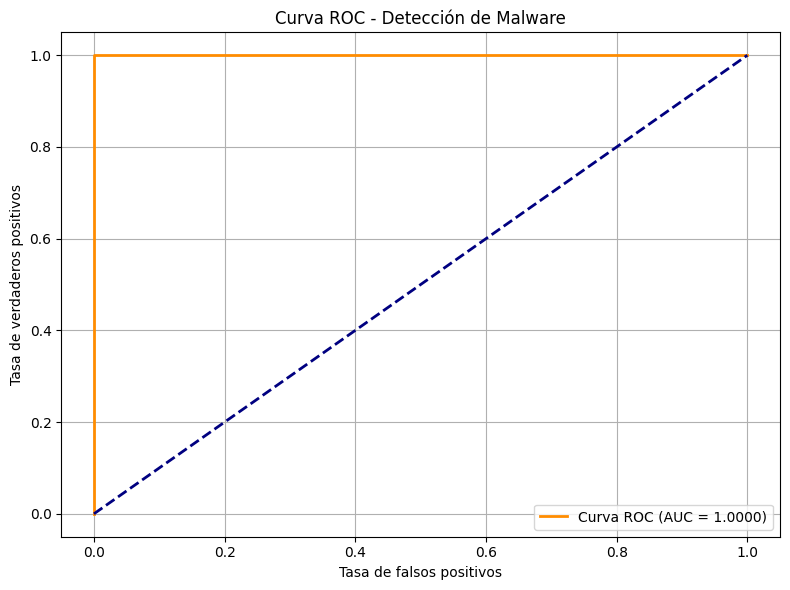

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilidades predichas para la clase positiva (malware)
y_proba = modelo.predict_proba(X_test_scaled)[:, 1]  # ← clase 1 (Malware)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC - Detección de Malware')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


**BLOQUE 8 Guardar el modelo entrenado**

In [19]:
import joblib

joblib.dump(modelo, "modelo_deteccion_malware.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']